Credit approval project

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.svm import SVC

In [122]:
local_dir = "/Users/joseguarneros/Desktop/DataProjects/CreditApproval/"

app_rec = pd.read_csv(local_dir + 'application_record.csv')
credit_rec = pd.read_csv(local_dir + 'credit_record.csv')

In [123]:
app_rec.head(15)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
5,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
6,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
7,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0
8,5008813,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0
9,5008814,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0


In [124]:
app_rec.rename(columns={'CODE_GENDER':'Gender','FLAG_OWN_CAR':'Car','FLAG_OWN_REALTY':'Realty',
                         'CNT_CHILDREN':'ChildNo','AMT_INCOME_TOTAL':'inc',
                         'NAME_EDUCATION_TYPE':'edutyp','NAME_FAMILY_STATUS':'famtyp',
                        'NAME_HOUSING_TYPE':'houtyp','FLAG_EMAIL':'email',
                         'NAME_INCOME_TYPE':'inctyp','FLAG_WORK_PHONE':'wkphone',
                         'FLAG_PHONE':'phone','CNT_FAM_MEMBERS':'famsize',
                        'OCCUPATION_TYPE':'occyp'
                        },inplace=True)



In [125]:
credit_rec.head(15)

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
5,5001712,-1,C
6,5001712,-2,C
7,5001712,-3,C
8,5001712,-4,C
9,5001712,-5,C


In [126]:
print(credit_rec.shape)
print(app_rec.shape)

(1048575, 3)
(438557, 18)
(1048575, 3)
(438557, 18)


In [127]:
app_rec.isnull().sum()

ID                    0
Gender                0
Car                   0
Realty                0
ChildNo               0
inc                   0
inctyp                0
edutyp                0
famtyp                0
houtyp                0
DAYS_BIRTH            0
DAYS_EMPLOYED         0
FLAG_MOBIL            0
wkphone               0
phone                 0
email                 0
occyp            134203
famsize               0
dtype: int64

In [128]:
app_rec.dtypes

ID                 int64
Gender            object
Car               object
Realty            object
ChildNo            int64
inc              float64
inctyp            object
edutyp            object
famtyp            object
houtyp            object
DAYS_BIRTH         int64
DAYS_EMPLOYED      int64
FLAG_MOBIL         int64
wkphone            int64
phone              int64
email              int64
occyp             object
famsize          float64
dtype: object

In [129]:
def convert_objects_to_categories(df):

    object_columns = df.select_dtypes(include=['object']).columns

    # Convert each object column to category type
    for col in object_columns:
        df[col] = df[col].astype('category')

    return df

app_rec = convert_objects_to_categories(app_rec)

In [130]:
app_rec.dtypes

ID                  int64
Gender           category
Car              category
Realty           category
ChildNo             int64
inc               float64
inctyp           category
edutyp           category
famtyp           category
houtyp           category
DAYS_BIRTH          int64
DAYS_EMPLOYED       int64
FLAG_MOBIL          int64
wkphone             int64
phone               int64
email               int64
occyp            category
famsize           float64
dtype: object

In [131]:
credit_rec.dtypes

ID                 int64
MONTHS_BALANCE     int64
STATUS            object
dtype: object

# Feature Engineering

In [132]:
credit_rec.isnull().sum()

ID                0
MONTHS_BALANCE    0
STATUS            0
dtype: int64

In [134]:
def fill_missing(df):
    mode_value = df['occyp'].mode()[0]
    df['occyp'].fillna(mode_value, inplace=True)
    return df
   
app_rec = fill_missing(app_rec)    

<positron-console-cell-134>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.




In [135]:
app_rec.isnull().sum()

ID               0
Gender           0
Car              0
Realty           0
ChildNo          0
inc              0
inctyp           0
edutyp           0
famtyp           0
houtyp           0
DAYS_BIRTH       0
DAYS_EMPLOYED    0
FLAG_MOBIL       0
wkphone          0
phone            0
email            0
occyp            0
famsize          0
dtype: int64

In [136]:
def get_cols(app_rec):
    for col in app_rec.columns:
        print(col, " : ", len(app_rec[col].unique()))
    
get_cols(app_rec)

ID  :  438510
Gender  :  2
Car  :  2
Realty  :  2
ChildNo  :  12
inc  :  866
inctyp  :  5
edutyp  :  5
famtyp  :  5
houtyp  :  6
DAYS_BIRTH  :  16379
DAYS_EMPLOYED  :  9406
FLAG_MOBIL  :  1
wkphone  :  2
phone  :  2
email  :  2
occyp  :  18
famsize  :  13
ID  :  438510
Gender  :  2
Car  :  2
Realty  :  2
ChildNo  :  12
inc  :  866
inctyp  :  5
edutyp  :  5
famtyp  :  5
houtyp  :  6
DAYS_BIRTH  :  16379
DAYS_EMPLOYED  :  9406
FLAG_MOBIL  :  1
wkphone  :  2
phone  :  2
email  :  2
occyp  :  18
famsize  :  13


In [137]:
app_rec.head()

,ID,Gender,Car,Realty,ChildNo,inc,inctyp,edutyp,famtyp,houtyp,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,wkphone,phone,email,occyp,famsize
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Laborers,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Laborers,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [138]:
app_rec['Age'] = round(-app_rec['DAYS_BIRTH'] / 365).astype('int')
app_rec['work_exp'] = round(-app_rec['DAYS_EMPLOYED'] / 365).astype('int')
app_rec = app_rec.drop(columns="DAYS_BIRTH")
app_rec = app_rec.drop(columns="DAYS_EMPLOYED")
app_rec.head()

,ID,Gender,Car,Realty,ChildNo,inc,inctyp,edutyp,famtyp,houtyp,FLAG_MOBIL,wkphone,phone,email,occyp,famsize,Age,work_exp
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,1,0,0,Laborers,2.0,33,12
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,1,0,0,Laborers,2.0,33,12
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,Security staff,2.0,59,3
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,Sales staff,1.0,52,8
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,Sales staff,1.0,52,8


In [141]:
app_rec['houtyp'].value_counts()

houtyp
House / apartment      393831
With parents            19077
Municipal apartment     14214
Rented apartment         5974
Office apartment         3922
Co-op apartment          1539
Name: count, dtype: int64

In [143]:
app_rec['occyp'].value_counts()

occyp
Laborers                 212443
Core staff                43007
Sales staff               41098
Managers                  35487
Drivers                   26090
High skill tech staff     17289
Accountants               15985
Medicine staff            13520
Cooking staff              8076
Security staff             7993
Cleaning staff             5845
Private service staff      3456
Low-skill Laborers         2140
Secretaries                2044
Waiters/barmen staff       1665
Realty agents              1041
HR staff                    774
IT staff                    604
Name: count, dtype: int64

We will drop this column as it isn't relevant to our approval/denial process. Will be good for EDA though

In [144]:
app_rec['edutyp'].value_counts()

edutyp
Secondary / secondary special    301821
Higher education                 117522
Incomplete higher                 14851
Lower secondary                    4051
Academic degree                     312
Name: count, dtype: int64

In [145]:
credit_rec['STATUS'].value_counts()

STATUS
C    442031
0    383120
X    209230
1     11090
5      1693
2       868
3       320
4       223
Name: count, dtype: int64

In [146]:
credit_rec['STATUS'] = credit_rec['STATUS'].astype('category')

In [147]:
app_rec.dtypes

ID               int64
Gender        category
Car           category
Realty        category
ChildNo          int64
inc            float64
inctyp        category
edutyp        category
famtyp        category
houtyp        category
FLAG_MOBIL       int64
wkphone          int64
phone            int64
email            int64
occyp         category
famsize        float64
Age              int64
work_exp         int64
dtype: object

# Exploratory Data Analysis

### New correlation plot with new features

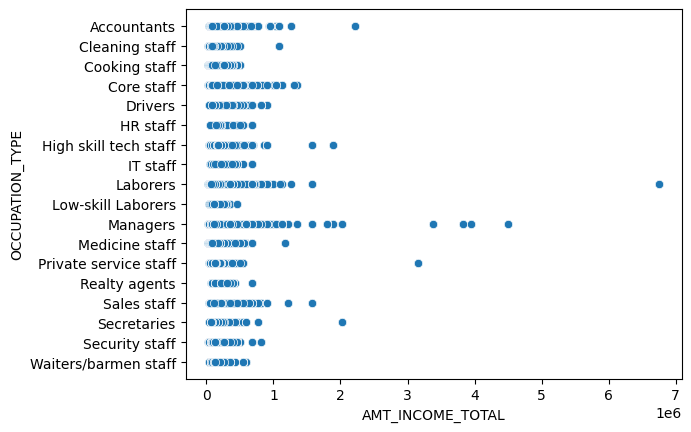

In [29]:
sns.scatterplot(app_rec, x='AMT_INCOME_TOTAL', y='OCCUPATION_TYPE')
plt.show()

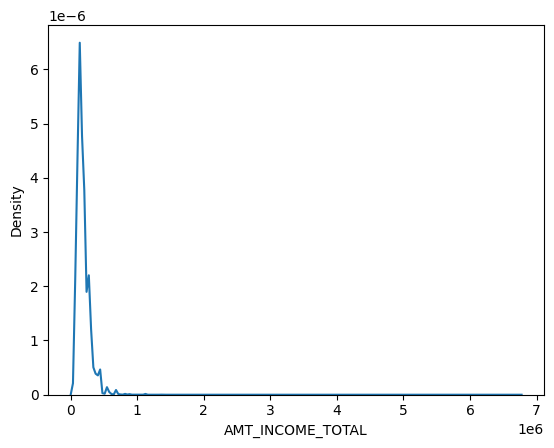

In [34]:
sns.kdeplot(app_rec['AMT_INCOME_TOTAL'])
plt.show()

In [27]:
appcredit_corr = app_rec.corr()
sns.heatmap(appcredit_corr, annot=True, fmt=".2f")
plt.figure(figsize=(20,10))

ValueError: could not convert string to float: 'Laborers'